In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import random
import re

In [2]:
data = pd.read_csv('./dataset_diabetes/diabetic_data.csv')
print(data.shape)
data.columns

(101766, 50)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [3]:
ID = pd.read_csv('./dataset_diabetes/IDs_mapping.csv')

In [4]:
ID

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [5]:
data['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [6]:
data = data.replace('?', np.nan)

In [7]:
data = data.drop('weight', axis = 1)

In [8]:
ID

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [9]:
data2 = ID[0:8]
data2.admission_type_id = data2.admission_type_id.astype(int)
data2

C:\Users\Leo\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [10]:
data3 = ID[10:40]
data3 = data3.rename(index=str, columns={"admission_type_id":"discharge_disposition_id"})
data3

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [11]:
data4 = ID[42:67]
data4 = data4.rename(index=str, columns={"admission_type_id":"admission_source_id"})
data4

,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


In [12]:
data2.admission_type_id = data2.admission_type_id.astype(int)
data3.discharge_disposition_id = data3.discharge_disposition_id.astype(int)
data4.admission_source_id = data4.admission_source_id.astype(int)

In [13]:
data2

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [14]:
data3

,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [15]:
data4

,admission_source_id,description
42,1,Physician Referral
43,2,Clinic Referral
44,3,HMO Referral
45,4,Transfer from a hospital
46,5,Transfer from a Skilled Nursing Facility (SNF)
47,6,Transfer from another health care facility
48,7,Emergency Room
49,8,Court/Law Enforcement
50,9,Not Available
51,10,Transfer from critial access hospital


In [16]:
new_data = pd.merge(data, data2, on='admission_type_id', how='inner')
new_data = pd.merge(new_data, data3, on='discharge_disposition_id', how='inner')
new_data = pd.merge(new_data, data4, on='admission_source_id', how='inner')
new_data.rename(columns={'description_x':'admission_type','description_y':'discharge_disposition','description':'admission_source'}, inplace=True)
new_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
1,1968528,720936,Caucasian,Female,[70-80),6,25,1,10,NaN,...,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
2,2223336,558360,AfricanAmerican,Female,[60-70),6,25,1,9,NaN,...,No,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral
3,2298006,2519748,Caucasian,Male,[60-70),6,25,1,4,NaN,...,No,No,No,No,Ch,Yes,NO,NaN,Not Mapped,Physician Referral
4,2356308,608841,AfricanAmerican,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral
5,2363592,1059561,Caucasian,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral
6,2398146,8147493,Caucasian,Male,[60-70),6,25,1,1,NaN,...,No,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral
7,2422806,3377124,Caucasian,Male,[40-50),6,25,1,14,NaN,...,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
8,2466036,4311585,Caucasian,Male,[60-70),6,25,1,10,NaN,...,No,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral
9,2473188,981198,Caucasian,Female,[60-70),6,25,1,5,NaN,...,No,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral


In [17]:
def target_helper(L):
    for i in L:
        if(i == 'NO'):
            return 0
        elif(i == '>30'):
            return 0
        else:
            return 1

In [18]:
new_data.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

In [19]:
new_data['goal'] = list(map(lambda x: 0 if x == "NO" else 1 if x == "<30" else 0, new_data['readmitted']))

In [20]:
new_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source,goal
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral,0
1,1968528,720936,Caucasian,Female,[70-80),6,25,1,10,NaN,...,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral,0
2,2223336,558360,AfricanAmerican,Female,[60-70),6,25,1,9,NaN,...,No,No,No,No,No,NO,NaN,Not Mapped,Physician Referral,0
3,2298006,2519748,Caucasian,Male,[60-70),6,25,1,4,NaN,...,No,No,No,Ch,Yes,NO,NaN,Not Mapped,Physician Referral,0
4,2356308,608841,AfricanAmerican,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral,0
5,2363592,1059561,Caucasian,Female,[50-60),6,25,1,1,NaN,...,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral,0
6,2398146,8147493,Caucasian,Male,[60-70),6,25,1,1,NaN,...,No,No,No,No,Yes,NO,NaN,Not Mapped,Physician Referral,0
7,2422806,3377124,Caucasian,Male,[40-50),6,25,1,14,NaN,...,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral,0
8,2466036,4311585,Caucasian,Male,[60-70),6,25,1,10,NaN,...,No,No,No,Ch,Yes,>30,NaN,Not Mapped,Physician Referral,0
9,2473188,981198,Caucasian,Female,[60-70),6,25,1,5,NaN,...,No,No,No,No,Yes,>30,NaN,Not Mapped,Physician Referral,0


In [21]:
new_data['self_pay'] = list(map(lambda x: 1 if x == "SP" else 0, new_data['payer_code']))

In [22]:
new_data[['self_pay','payer_code']]

,self_pay,payer_code
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


In [23]:
new_data['self_pay'].value_counts()

0    96759
1     5007
Name: self_pay, dtype: int64

In [24]:
new_data['medicaid/medicare'] = list(map(lambda x: 1 if (x == "MD" or x == "MC") else 0, new_data['payer_code']))

In [25]:
new_data[['medicaid/medicare', 'payer_code']]

,medicaid/medicare,payer_code
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


In [26]:
new_data['coverByInsurance'] = list(map(lambda x: 1 if (x in ['HM','BC','CP', 'UN', 'CM', 'OG', 'PO', 'DM', 'CH', 'WC', 'OT', 'MP','SI', 'FR']) else 0, new_data['payer_code']))

In [27]:
new_data[['coverByInsurance', 'payer_code']]

,coverByInsurance,payer_code
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
5,0,NaN
6,0,NaN
7,0,NaN
8,0,NaN
9,0,NaN


In [28]:
new_data['race']

0               Caucasian
1               Caucasian
2         AfricanAmerican
3               Caucasian
4         AfricanAmerican
5               Caucasian
6               Caucasian
7               Caucasian
8               Caucasian
9               Caucasian
10              Caucasian
11                  Other
12              Caucasian
13              Caucasian
14              Caucasian
15              Caucasian
16                    NaN
17        AfricanAmerican
18        AfricanAmerican
19              Caucasian
20        AfricanAmerican
21              Caucasian
22              Caucasian
23              Caucasian
24        AfricanAmerican
25                    NaN
26              Caucasian
27              Caucasian
28              Caucasian
29        AfricanAmerican
               ...       
101736          Caucasian
101737          Caucasian
101738          Caucasian
101739          Caucasian
101740          Caucasian
101741                NaN
101742                NaN
101743    Af

In [29]:
new_data['race'] = new_data['race'].replace(np.nan, 'Other')

In [30]:
new_data['medical_specialty'] = new_data['medical_specialty'].replace(np.nan, 'No')

In [31]:
new_data['diag_1']

0         250.83
1            440
2            997
3            486
4         250.03
5            414
6            414
7            730
8            414
9          250.4
10           824
11           414
12           562
13         250.7
14           510
15           263
16           414
17           295
18           722
19           722
20           182
21           642
22           410
23           491
24        250.03
25           625
26           571
27           997
28           428
29           414
           ...  
101736       440
101737       V58
101738       155
101739       428
101740     250.8
101741       427
101742       225
101743       518
101744       560
101745       157
101746       410
101747       434
101748       434
101749       715
101750       715
101751       518
101752       998
101753       996
101754       V57
101755       V57
101756       414
101757       V57
101758       V57
101759       V57
101760       V57
101761       V57
101762       V57
101763       V

In [32]:
new_data['diag_2'] = new_data['diag_2'].replace(np.nan, '0')

In [33]:
new_data['diag_3'] = new_data['diag_3'].replace(np.nan, '0')

In [34]:
new_data['diag_1'] = new_data['diag_1'].replace(np.nan, '0')

In [35]:
new_data.isna().any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide     

In [36]:
new_data['admission_type']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
            ...    
101736       Urgent
101737     Elective
101738       Urgent
101739     Elective
101740     Elective
101741       Urgent
101742       Urgent
101743       Urgent
101744       Urgent
101745       Urgent
101746       Urgent
101747       Urgent
101748       Urgent
101749     Elective
101750     Elective
101751    Emergency
101752    Emergency
101753       Urgent
101754     Elective


In [37]:
#for i in range(len(new_data['admission_type'])):
#    if new_data['admission_type'][i] is np.nan:
#        new_data['admission_type'][i] = random.choice(new_data['admission_type'])

In [38]:
#new_data['admission_type'].value_counts()

In [39]:
#new_data['admission_type'].replace(np.nan, random.choice(new_data['admission_type']))

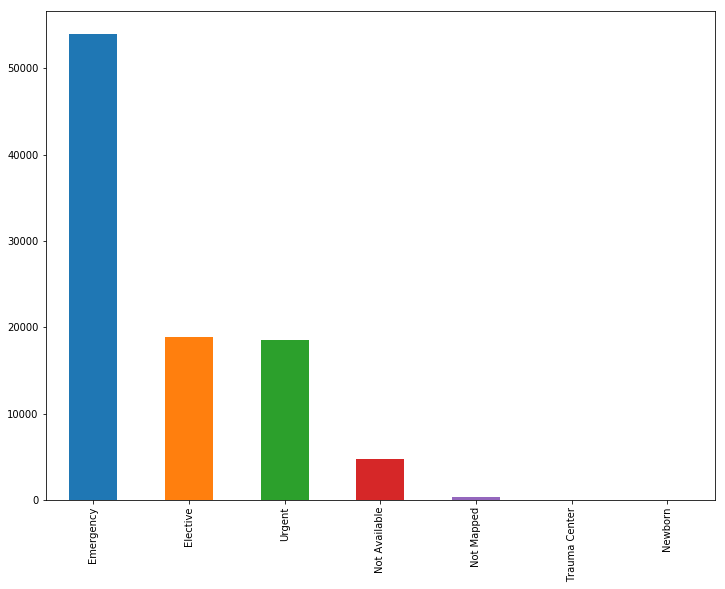

In [40]:
pd.value_counts(new_data['admission_type']).plot.bar(figsize = (12,9))

In [41]:
new_data['admission_type'] = new_data['admission_type'].fillna(random.choice(new_data['admission_type']))

In [42]:
new_data.isna().any()

encounter_id                False
patient_nbr                 False
race                        False
gender                      False
age                         False
admission_type_id           False
discharge_disposition_id    False
admission_source_id         False
time_in_hospital            False
payer_code                   True
medical_specialty           False
num_lab_procedures          False
num_procedures              False
num_medications             False
number_outpatient           False
number_emergency            False
number_inpatient            False
diag_1                      False
diag_2                      False
diag_3                      False
number_diagnoses            False
max_glu_serum               False
A1Cresult                   False
metformin                   False
repaglinide                 False
nateglinide                 False
chlorpropamide              False
glimepiride                 False
acetohexamide               False
glipizide     

In [43]:
new_data['discharge_disposition'] = new_data['discharge_disposition'].fillna("No")

In [44]:
#for i in range(len(new_data['admission_source'])):
#    if new_data['admission_source'][i] is np.nan:
#        new_data['admission_source'][i] = random.choice(new_data['admission_source'])

In [45]:
new_data

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,change,diabetesMed,readmitted,admission_type,discharge_disposition,admission_source,goal,self_pay,medicaid/medicare,coverByInsurance
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,NO,Emergency,Not Mapped,Physician Referral,0,0,0,0
1,1968528,720936,Caucasian,Female,[70-80),6,25,1,10,NaN,...,Ch,Yes,>30,Emergency,Not Mapped,Physician Referral,0,0,0,0
2,2223336,558360,AfricanAmerican,Female,[60-70),6,25,1,9,NaN,...,No,No,NO,Emergency,Not Mapped,Physician Referral,0,0,0,0
3,2298006,2519748,Caucasian,Male,[60-70),6,25,1,4,NaN,...,Ch,Yes,NO,Emergency,Not Mapped,Physician Referral,0,0,0,0
4,2356308,608841,AfricanAmerican,Female,[50-60),6,25,1,1,NaN,...,No,Yes,>30,Emergency,Not Mapped,Physician Referral,0,0,0,0
5,2363592,1059561,Caucasian,Female,[50-60),6,25,1,1,NaN,...,No,Yes,NO,Emergency,Not Mapped,Physician Referral,0,0,0,0
6,2398146,8147493,Caucasian,Male,[60-70),6,25,1,1,NaN,...,No,Yes,NO,Emergency,Not Mapped,Physician Referral,0,0,0,0
7,2422806,3377124,Caucasian,Male,[40-50),6,25,1,14,NaN,...,Ch,Yes,>30,Emergency,Not Mapped,Physician Referral,0,0,0,0
8,2466036,4311585,Caucasian,Male,[60-70),6,25,1,10,NaN,...,Ch,Yes,>30,Emergency,Not Mapped,Physician Referral,0,0,0,0
9,2473188,981198,Caucasian,Female,[60-70),6,25,1,5,NaN,...,No,Yes,>30,Emergency,Not Mapped,Physician Referral,0,0,0,0


In [46]:
new_data['diabetic'] = 0

In [47]:
new_data['diabetic']

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
101736    0
101737    0
101738    0
101739    0
101740    0
101741    0
101742    0
101743    0
101744    0
101745    0
101746    0
101747    0
101748    0
101749    0
101750    0
101751    0
101752    0
101753    0
101754    0
101755    0
101756    0
101757    0
101758    0
101759    0
101760    0
101761    0
101762    0
101763    0
101764    0
101765    0
Name: diabetic, Length: 101766, dtype: int64

In [48]:
for i in range(len(new_data)):
    if(re.match(r'250.',new_data.loc[i,'diag_1']) or re.match(r'250.',new_data.loc[i,'diag_2']) or re.match(r'250.',new_data.loc[i,'diag_3'])):
        new_data.loc[i,'diabetic'] = 1
    else:
        new_data.loc[i,'diabetic'] = 0

In [49]:
new_data[['diag_1','diag_2','diag_3','diabetic']]

,diag_1,diag_2,diag_3,diabetic
0,250.83,0,0,1
1,440,413,250.52,1
2,997,8,730,0
3,486,250,427,0
4,250.03,401,276,1
5,414,340,401,0
6,414,496,401,0
7,730,998,250,0
8,414,276,276,0
9,250.4,403,276,1


In [50]:
new_data['diabetic'].value_counts()

0    81600
1    20166
Name: diabetic, dtype: int64

In [51]:
feature = ['diag_1','diag_2','diag_3']
def detection(v):
    if v[0]== "V" or v[0] == 'E':
        v = '9999'
        return v
    else:
        return v
for e in feature:
    for i in new_data[e].index:
        new_data[e].at[i] = detection(new_data[e].at[i])

    
new_data.diag_1.value_counts()
new_data.diag_2.value_counts()

276       6752
428       6662
250       6071
427       5036
401       3736
496       3305
599       3288
403       2823
414       2650
411       2566
9999      2536
250.02    2074
707       1999
585       1871
584       1649
491       1545
250.01    1523
285       1520
780       1491
425       1434
682       1433
486       1379
518       1355
424       1071
413       1042
250.6      895
493        881
305        702
786        644
280        606
          ... 
164          1
163          1
580          1
173          1
811          1
702          1
734          1
833          1
605          1
927          1
871          1
268          1
5            1
846          1
674          1
195          1
114          1
880          1
754          1
703          1
123          1
947          1
256          1
271          1
115          1
955          1
974          1
316          1
843          1
963          1
Name: diag_2, Length: 652, dtype: int64

In [52]:
new_data.diag_3.value_counts()
new_data.diag_1 = new_data.diag_1.astype(float)
new_data.diag_2 = new_data.diag_2.astype(float)
new_data.diag_3 = new_data.diag_3.astype(float)
new_data.diag_1.dtypes

dtype('float64')

In [53]:
def catagory(v):
    if 0.0 <= v < 1.0:
        return 'No Diagnosis'
    elif 1.0<= v < 140.0:
        return 'infectious and parasitic diseases'
    elif 140.0 <= v < 240.0:
        return 'neoplasms'
    elif 240.0 <= v < 280.0:
        return 'endocrine, nutritional and metabolic diseases, and immunity disorders'
    elif 280.0 <= v < 290.0:
        return 'diseases of the blood and blood-forming organs'
    elif 290.0 <= v < 320.0:
        return 'mental disorders'
    elif 320.0 <= v < 390.0:
        return 'diseases of the nervous system and sense organs'
    elif 390.0 <= v < 460.0:
        return 'diseases of the circulatory system'
    elif 460.0 <= v < 520.0:
        return 'diseases of the respiratory system'
    elif 520.0 <= v < 580.0:
        return 'diseases of the digestive system'
    elif 580.0 <= v < 630.0:
        return 'diseases of the genitourinary system'
    elif 630.0 <= v < 680.0:
        return 'complications of pregnancy, childbirth, and the puerperium'
    elif 680.0 <= v < 710.0:
        return 'diseases of the skin and subcutaneous tissue'
    elif 710.0 <= v < 740.0:
        return 'diseases of the musculoskeletal system and connective tissue'
    elif 740.0 <= v < 760.0:
        return 'congenital anomalies'
    elif 760.0 <= v < 780.0:
        return 'certain conditions originating in the perinatal period'
    elif 780.0 <= v < 800.0:
        return 'symptoms, signs, and ill-defined conditions'
    elif 800.0 <= v < 999.0:
        return 'injury and poisoning'
    else:
        return 'external causes of injury and supplemental classification'

new_data['f_diag'] = new_data.diag_1.apply(lambda v: catagory(v))
new_data['s_diag'] = new_data.diag_2.apply(lambda v: catagory(v))
new_data['t_diag'] = new_data.diag_3.apply(lambda v: catagory(v))
new_data['f_diag'].head()

0    endocrine, nutritional and metabolic diseases,...
1                   diseases of the circulatory system
2                                 injury and poisoning
3                   diseases of the respiratory system
4    endocrine, nutritional and metabolic diseases,...
Name: f_diag, dtype: object

In [54]:
new_data.dtypes

encounter_id                  int64
patient_nbr                   int64
race                         object
gender                       object
age                          object
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                   object
medical_specialty            object
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_outpatient             int64
number_emergency              int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                object
A1Cresult                    object
metformin                    object
repaglinide                  object
nateglinide                  object
chlorpropamide               object
glimepiride                 

In [55]:
new_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type', 'discharge_disposition', 'admission_source', 'goal',
       'self_pay', 'medi

In [56]:
#for i in new_data.columns:
#    if(np.issubdtype(new_data[i].dtype, np.number)):
#        pass
#    else:
#        new_data[i] = new_data[i].astype('category')
#        new_data[i].cat.codes

In [57]:
new_dataTemp = new_data.drop(['diag_1', 'diag_2', 'diag_3', 'readmitted', 'admission_type','admission_source','discharge_disposition', 'payer_code'], axis = 1)

In [58]:
new_dataTemp['admission_type_id'] = pd.Categorical(new_dataTemp.admission_type_id)
new_dataTemp['discharge_disposition_id'] = pd.Categorical(new_dataTemp.discharge_disposition_id)
new_dataTemp['admission_source_id'] = pd.Categorical(new_dataTemp.admission_source_id)

In [59]:
cat_cols = list(new_dataTemp.select_dtypes(include=[object]).columns)
for col in cat_cols:
    new_dataTemp[col] = pd.Categorical(new_dataTemp[col])

In [60]:
le = preprocessing.LabelEncoder()

In [61]:
new_dataTemp.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'goal', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'diabetic', 'f_diag', 's_diag',
       't_diag'],
      dtype='object')

In [62]:
new_data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type', 'discharge_disposition', 'admission_source', 'goal',
       'self_pay', 'medi

In [63]:
col_to_encode = new_data[list(new_dataTemp.select_dtypes(include=['category']).columns)]
for col in col_to_encode:
    new_dataTemp[col] = le.fit_transform(new_dataTemp[col])


In [64]:
le = preprocessing.LabelEncoder()
col_to_encode = data[list(data.select_dtypes(include=['category']).columns)]
for col in col_to_encode:
    data[col] = le.fit_transform(data[col])

In [65]:
new_dataTemp

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,change,diabetesMed,goal,self_pay,medicaid/medicare,coverByInsurance,diabetic,f_diag,s_diag,t_diag
0,2278392,8222157,2,0,0,5,23,0,1,38,...,1,0,0,0,0,0,1,11,0,0
1,1968528,720936,2,0,7,5,23,0,10,61,...,0,1,0,0,0,0,1,4,4,11
2,2223336,558360,0,0,6,5,23,0,9,29,...,1,0,0,0,0,0,0,14,13,7
3,2298006,2519748,2,1,6,5,23,0,4,18,...,0,1,0,0,0,0,0,9,11,4
4,2356308,608841,0,0,5,5,23,0,1,11,...,1,1,0,0,0,0,1,11,4,11
5,2363592,1059561,2,0,5,5,23,0,1,3,...,1,1,0,0,0,0,0,4,8,4
6,2398146,8147493,2,1,6,5,23,0,1,3,...,1,1,0,0,0,0,0,4,9,4
7,2422806,3377124,2,1,4,5,23,0,14,18,...,0,1,0,0,0,0,0,7,14,11
8,2466036,4311585,2,1,6,5,23,0,10,3,...,0,1,0,0,0,0,0,4,11,11
9,2473188,981198,2,0,6,5,23,0,5,19,...,1,1,0,0,0,0,1,11,4,11


In [66]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
#from __future__ import print_function
from sklearn.cluster import KMeans
kmeans = KMeans()

In [67]:
kmeans.set_params(n_clusters=8)
kmeans.fit(new_dataTemp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [68]:
label_pred = kmeans.labels_
print(label_pred)

[4 4 4 ... 5 0 0]


In [69]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.61445420e+08  1.34143490e+08  1.99126545e+00  4.80826587e-01
   6.16702173e+00  6.82573498e-01  1.93012356e+00  4.36727738e+00
   4.11546655e+00  2.23853856e+01  4.12330635e+01  1.50276949e+00
   1.64043460e+01  2.56497657e-01  1.87047294e-01  3.68555603e-01
   8.13357478e+00  1.99914785e+00  1.88176395e+00  1.22155944e+00
   1.01661696e+00  1.00852152e+00  1.00021304e+00  1.05134214e+00
   8.99548990e-19  1.11951427e+00  1.08095441e+00  3.71339244e-18
   1.07903707e+00  1.02513847e+00  1.00234342e+00  1.00042608e+00
   1.98883336e-18 -2.55329612e-17  0.00000000e+00  0.00000000e+00
   1.48508735e+00  1.00788240e+00  1.01915004e-17  8.99548990e-19
   2.13037921e-04  8.99548990e-19  4.97017469e-01  7.93140179e-01
   9.50149127e-02  6.13549212e-02  4.69961653e-01  2.81423093e-01
   1.43374521e-01  8.47166596e+00  8.21090754e+00  8.63272262e+00]
 [ 9.76370901e+07  1.82690319e+07  1.59146269e+00  4.49791045e-01
   6.02298507e+00  1.18692537e+00  2.21444776e+00  5.12340299e+00
   4.4411

In [70]:
inertia = kmeans.inertia_
print(inertia)

9.481468263480109e+19


In [71]:
from PlottingFunctions import plot_inertia, plot_silhouette

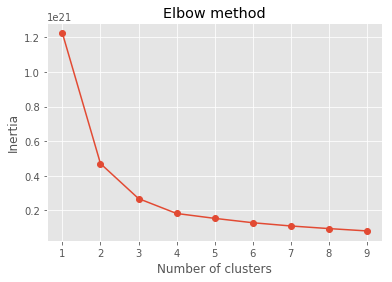

In [72]:
plot_inertia(kmeans, new_dataTemp, range(1, 10))

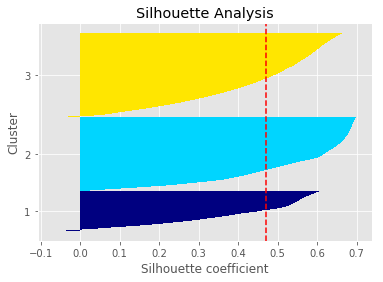

In [73]:
kmeans.set_params(n_clusters=3)
plot_silhouette(kmeans, new_dataTemp)

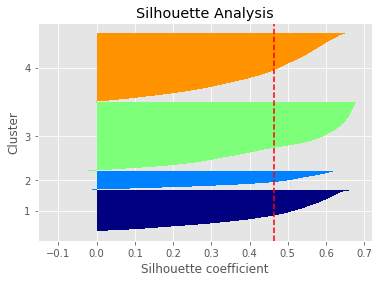

In [74]:
kmeans.set_params(n_clusters=4)
plot_silhouette(kmeans, new_dataTemp)

In [75]:
kmeans.set_params(n_clusters=3)
kmeans.fit(new_dataTemp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [76]:
new_dataTemp['clustering3']= kmeans.labels_
new_data['clustering3']= kmeans.labels_

In [77]:
kmeans.set_params(n_clusters=4)
kmeans.fit(new_dataTemp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [78]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.54439222e+08  6.62142936e+07  1.63871023e+00  4.58476185e-01
   6.14450458e+00  1.02167569e+00  2.22998895e+00  3.93154450e+00
   4.38044371e+00  2.17857082e+01  4.23115065e+01  1.29702774e+00
   1.61008415e+01  4.10364662e-01  2.23613748e-01  6.47805514e-01
   7.60445414e+00  1.99302978e+00  1.92318590e+00  1.19689457e+00
   1.01906894e+00  1.00963364e+00  1.00048168e+00  1.05505341e+00
   6.10033129e-18  1.12421727e+00  1.08837447e+00  1.41671153e-04
   1.07981753e+00  1.07689910e+00  1.00311677e+00  1.00051002e+00
   6.06814403e-18  2.83342306e-04  0.00000000e+00  0.00000000e+00
   1.41149803e+00  1.01014365e+00  3.11676536e-04  6.10033129e-18
   1.22006626e-17  6.10033129e-18  5.14124614e-01  7.70861077e-01
   1.15461990e-01  6.80588219e-02  4.38103873e-01  2.29025586e-01
   1.77088941e-01  8.54928739e+00  8.11526365e+00  8.40209107e+00
   1.91460063e+00]
 [ 3.77950867e+08  9.43705921e+07  1.90465808e+00  4.71754212e-01
   6.24995045e+00  6.75024777e-01  1.94301288e+00  4.4225

In [79]:
new_dataTemp['clustering4']= kmeans.labels_
new_data['clustering4']= kmeans.labels_

In [80]:
kmeans.set_params(n_clusters=2)
kmeans.fit(new_dataTemp)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [81]:
new_dataTemp['clustering2']= kmeans.labels_
new_data['clustering2']= kmeans.labels_

In [82]:
new_dataT = new_data.drop(['diag_1', 'diag_2', 'diag_3', 'readmitted', 'admission_type','admission_source','discharge_disposition', 'payer_code', 'diabetic'], axis = 1)

In [83]:
new_dataT.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'goal', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering3', 'clustering4', 'clustering2'],
      dtype='obj

In [84]:
new_dataT.to_csv('new_data.csv')

In [85]:
grounded = new_dataTemp.groupby('clustering3')

In [86]:
for key, item in grounded:
    print(key, grounded.get_group(key), "\n\n")

0         encounter_id  patient_nbr  race  gender  age  admission_type_id  \
478        257007498     63780093     2       1    8                  5   
479        259227504     61234776     2       0    7                  5   
480        260892456     24345990     2       0    7                  5   
481        263289720    105373080     2       1    6                  5   
482        263631036     88618455     2       1    8                  5   
483        268507608      2927232     3       0    7                  5   
484        272226498    108376542     2       1    5                  5   
485        278200830     98531100     2       0    9                  5   
486        283533642     33596856     2       1    7                  5   
487        290211810    112121874     2       1    6                  5   
488        291715152     20373453     3       1    3                  5   
489        334345184     45395514     2       1    5                  5   
490        338405894   

In [87]:
new_dataTemp.groupby('clustering3')['goal'].value_counts()

clustering3  goal
0            0       18319
             1        2173
1            0       34086
             1        4326
2            0       38004
             1        4858
Name: goal, dtype: int64

In [88]:
new_dataTemp.groupby('clustering3').agg(['mean']).T

,clustering3,0,1,2
encounter_id,mean,3.264692e+08,6.743814e+07,1.757144e+08
patient_nbr,mean,8.008757e+07,2.612145e+07,6.729634e+07
race,mean,1.863361e+00,1.643861e+00,1.697028e+00
gender,mean,4.702323e-01,4.597001e-01,4.611777e-01
age,mean,6.212278e+00,5.953582e+00,6.169707e+00
admission_type_id,mean,7.239411e-01,1.279939e+00,9.381037e-01
discharge_disposition_id,mean,1.974624e+00,3.557066e+00,2.228827e+00
admission_source_id,mean,4.357115e+00,5.219046e+00,4.032500e+00
time_in_hospital,mean,4.113849e+00,4.602676e+00,4.345644e+00
medical_specialty,mean,2.197492e+01,2.254634e+01,2.183951e+01


In [89]:
new_dataTemp.groupby('clustering3').agg(['std'])

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,goal,self_pay,medicaid/medicare,coverByInsurance,diabetic,f_diag,s_diag,t_diag,clustering4,clustering2
,std,std,std,std,std,std,std,std,std,std,...,std,std,std,std,std,std,std,std,std,std
clustering3,,,,,,,,,,,,,,,,,,,,,
0,5.861865e+07,4.013283e+07,0.858190,0.499223,1.549228,1.118985,3.933174,2.907557,2.818570,11.389929,...,0.307898,0.256674,0.499996,0.460107,0.358708,4.424341,4.101613,4.216803,0.999905,0.000000
1,3.215211e+07,2.979584e+07,0.993326,0.498432,1.636806,1.678323,6.262925,4.142809,3.113443,14.737830,...,0.316133,0.084005,0.360467,0.285248,0.432385,4.558490,4.141328,4.214758,0.537403,0.000000
2,3.652262e+07,2.812847e+07,0.870162,0.498543,1.566798,1.314649,4.379870,3.042024,2.931397,13.202582,...,0.317012,0.265876,0.498458,0.435013,0.379895,4.461466,4.160636,4.149463,1.293490,0.452439


In [90]:
df_count_type = new_dataTemp.groupby('clustering3').apply(np.size)

In [91]:
df_count_type

clustering3
0    1127060
1    2112660
2    2357410
dtype: int64

In [92]:
kmeans.cluster_centers_

array([[ 2.88006102e+08,  7.63689922e+07,  1.86251562e+00,
         4.68775715e-01,  6.22449788e+00,  7.46578891e-01,
         2.02392490e+00,  4.40708909e+00,  4.17424035e+00,
         2.19229527e+01,  4.33930389e+01,  1.33055987e+00,
         1.67386547e+01,  5.39818963e-01,  2.94779190e-01,
         6.90865868e-01,  8.05805980e+00,  1.99323398e+00,
         1.88848252e+00,  1.21181921e+00,  1.01935327e+00,
         1.00807656e+00,  1.00030478e+00,  1.05690165e+00,
         5.79201129e-18,  1.11416903e+00,  1.07960745e+00,
         9.14327512e-05,  1.08341715e+00,  1.04480205e+00,
         1.00344397e+00,  1.00027430e+00,  8.85657650e-18,
        -6.67326437e-17,  0.00000000e+00,  0.00000000e+00,
         1.44588705e+00,  1.00987474e+00,  6.09551675e-05,
         3.04775837e-05,  6.09551675e-05,  3.04775837e-05,
         4.79473347e-01,  7.99640365e-01,  1.07281095e-01,
         7.93636281e-02,  5.10743348e-01,  3.10017982e-01,
         1.59153942e-01,  8.48279540e+00,  8.27563927e+0

In [93]:
new_dataTemp

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,...,self_pay,medicaid/medicare,coverByInsurance,diabetic,f_diag,s_diag,t_diag,clustering3,clustering4,clustering2
0,2278392,8222157,2,0,0,5,23,0,1,38,...,0,0,0,1,11,0,0,1,2,1
1,1968528,720936,2,0,7,5,23,0,10,61,...,0,0,0,1,4,4,11,1,2,1
2,2223336,558360,0,0,6,5,23,0,9,29,...,0,0,0,0,14,13,7,1,2,1
3,2298006,2519748,2,1,6,5,23,0,4,18,...,0,0,0,0,9,11,4,1,2,1
4,2356308,608841,0,0,5,5,23,0,1,11,...,0,0,0,1,11,4,11,1,2,1
5,2363592,1059561,2,0,5,5,23,0,1,3,...,0,0,0,0,4,8,4,1,2,1
6,2398146,8147493,2,1,6,5,23,0,1,3,...,0,0,0,0,4,9,4,1,2,1
7,2422806,3377124,2,1,4,5,23,0,14,18,...,0,0,0,0,7,14,11,1,2,1
8,2466036,4311585,2,1,6,5,23,0,10,3,...,0,0,0,0,4,11,11,1,2,1
9,2473188,981198,2,0,6,5,23,0,5,19,...,0,0,0,1,11,4,11,1,2,1


In [94]:
new_df=new_dataTemp[:]

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_pca = pd.DataFrame(pca.fit_transform(new_df))

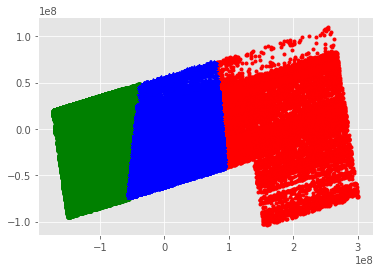

In [96]:
import matplotlib.pyplot as plt
d = new_pca[new_df['clustering3'] == 0]
plt.plot(d[0], d[1], 'r.')
d = new_pca[new_df['clustering3'] == 1]
plt.plot(d[0], d[1], 'go')
d = new_pca[new_df['clustering3'] == 2]
plt.plot(d[0], d[1], 'b*')
plt.gcf().savefig('kmeans.png')
plt.show()

In [97]:
new_dataTemp.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'goal', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'diabetic', 'f_diag', 's_diag',
       't_diag', 'clustering3', 'clustering4', 'clustering2'],
    

In [98]:
y = new_dataTemp['goal']

In [99]:
gbm_data = new_dataTemp.drop(['encounter_id', 'patient_nbr', 'clustering3', 'clustering4', 'goal', 'diabetic'], axis = 1)

In [100]:
gbm_data

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,metformin-pioglitazone,change,diabetesMed,self_pay,medicaid/medicare,coverByInsurance,f_diag,s_diag,t_diag,clustering2
0,2,0,0,5,23,0,1,38,41,0,...,0,1,0,0,0,0,11,0,0,1
1,2,0,7,5,23,0,10,61,56,2,...,0,0,1,0,0,0,4,4,11,1
2,0,0,6,5,23,0,9,29,60,5,...,0,1,0,0,0,0,14,13,7,1
3,2,1,6,5,23,0,4,18,47,0,...,0,0,1,0,0,0,9,11,4,1
4,0,0,5,5,23,0,1,11,50,0,...,0,1,1,0,0,0,11,4,11,1
5,2,0,5,5,23,0,1,3,1,6,...,0,1,1,0,0,0,4,8,4,1
6,2,1,6,5,23,0,1,3,31,2,...,0,1,1,0,0,0,4,9,4,1
7,2,1,4,5,23,0,14,18,41,1,...,0,0,1,0,0,0,7,14,11,1
8,2,1,6,5,23,0,10,3,46,6,...,0,0,1,0,0,0,4,11,11,1
9,2,0,6,5,23,0,5,19,47,3,...,0,1,1,0,0,0,11,4,11,1


In [101]:
X_train, X_test, y_train, y_test = train_test_split(gbm_data, y, test_size=0.33, random_state=42)

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [103]:
gbm = GradientBoostingClassifier(loss = "deviance", max_features = "sqrt")
depth = [2,3,5]
n_est = [1000,2000,3000]
grid_param = [{"max_depth": depth, "n_estimators": n_est}]
n_folds = 5

clf = GridSearchCV(gbm, grid_param, cv = n_folds, refit = False)
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

In [104]:
print(clf.best_params_)

{'max_depth': 2, 'n_estimators': 1000}


In [105]:
gbm = GradientBoostingClassifier(max_features = "sqrt", learning_rate = 0.03, max_depth = 3, n_estimators = 2000, loss = "deviance")
gbm.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [106]:
gbm_coefs_df = pd.concat([pd.DataFrame(X_train.columns), pd.DataFrame(gbm.feature_importances_)], axis = 1)
gbm_coefs_df.columns = ["Col", "Coef"]
gbm_coefs_df = gbm_coefs_df.sort_values(by="Coef", ascending = False)

In [107]:
gbm_coefs_df

,Col,Coef
13,number_inpatient,0.316234
4,discharge_disposition_id,0.187268
12,number_emergency,0.065508
10,num_medications,0.036800
6,time_in_hospital,0.034051
8,num_lab_procedures,0.033753
14,number_diagnoses,0.030649
7,medical_specialty,0.026431
46,s_diag,0.024704
45,f_diag,0.024645


In [108]:
print("Accuracy score (training): {0:.3f}".format(gbm.score(X_train, y_train)))

Accuracy score (training): 0.890


In [109]:
print("Accuracy score (testing): {0:.3f}".format(gbm.score(X_test, y_test)))

Accuracy score (testing): 0.890


In [110]:
predictions = gbm.predict(X_test)

In [111]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[29836    65]
 [ 3614    68]]


In [112]:
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29901
           1       0.51      0.02      0.04      3682

   micro avg       0.89      0.89      0.89     33583
   macro avg       0.70      0.51      0.49     33583
weighted avg       0.85      0.89      0.84     33583



In [113]:
y_scores_gb = gbm.decision_function(X_test)
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_scores_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb))

Area under ROC curve = 0.68


In [114]:
gbm_data1 = gbm_data.copy()

In [115]:
gbm_data1['random'] = np.random.randint(2, size=len(gbm_data1))

In [116]:
gbm_data1

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,...,change,diabetesMed,self_pay,medicaid/medicare,coverByInsurance,f_diag,s_diag,t_diag,clustering2,random
0,2,0,0,5,23,0,1,38,41,0,...,1,0,0,0,0,11,0,0,1,1
1,2,0,7,5,23,0,10,61,56,2,...,0,1,0,0,0,4,4,11,1,1
2,0,0,6,5,23,0,9,29,60,5,...,1,0,0,0,0,14,13,7,1,0
3,2,1,6,5,23,0,4,18,47,0,...,0,1,0,0,0,9,11,4,1,1
4,0,0,5,5,23,0,1,11,50,0,...,1,1,0,0,0,11,4,11,1,1
5,2,0,5,5,23,0,1,3,1,6,...,1,1,0,0,0,4,8,4,1,0
6,2,1,6,5,23,0,1,3,31,2,...,1,1,0,0,0,4,9,4,1,1
7,2,1,4,5,23,0,14,18,41,1,...,0,1,0,0,0,7,14,11,1,0
8,2,1,6,5,23,0,10,3,46,6,...,0,1,0,0,0,4,11,11,1,1
9,2,0,6,5,23,0,5,19,47,3,...,1,1,0,0,0,11,4,11,1,1


In [117]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(gbm_data1, y, test_size=0.33, random_state=42)

In [118]:
X_train1.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'self_pay',
       'medicaid/medicare', 'coverByInsurance', 'f_diag', 's_diag', 't_diag',
       'clustering2', 'random'],
      dtype='object')

In [119]:
gbm.fit(X_train1, y_train1)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [120]:
gbm_coefs_df1 = pd.concat([pd.DataFrame(X_train1.columns), pd.DataFrame(gbm.feature_importances_)], axis = 1)
gbm_coefs_df1.columns = ["Col", "Coef"]
gbm_coefs_df1 = gbm_coefs_df.sort_values(by="Coef", ascending = False)

In [121]:
gbm_coefs_df

,Col,Coef
13,number_inpatient,0.316234
4,discharge_disposition_id,0.187268
12,number_emergency,0.065508
10,num_medications,0.036800
6,time_in_hospital,0.034051
8,num_lab_procedures,0.033753
14,number_diagnoses,0.030649
7,medical_specialty,0.026431
46,s_diag,0.024704
45,f_diag,0.024645


In [122]:
y_scores_gb1 = gbm.decision_function(X_test1)
fpr_gb1, tpr_gb1, _ = roc_curve(y_test1, y_scores_gb1)
roc_auc_gb1 = auc(fpr_gb1, tpr_gb1)

print("Area under ROC curve = {:0.2f}".format(roc_auc_gb1))

Area under ROC curve = 0.68


In [123]:
gbm_dataClustering = new_dataTemp.drop(['encounter_id', 'patient_nbr', 'goal', 'diabetic'], axis = 1)

In [124]:
X_trainC, X_testC, y_trainC, y_testC = train_test_split(gbm_dataClustering, y, test_size=0.33, random_state=42)

In [125]:
gbm = GradientBoostingClassifier(max_features = "sqrt", learning_rate = 0.03, max_depth = 3, n_estimators = 2000, loss = "deviance")
gbm.fit(X_trainC, y_trainC)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.03, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=2000,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [126]:
gbm_coefs_dfC = pd.concat([pd.DataFrame(X_trainC.columns), pd.DataFrame(gbm.feature_importances_)], axis = 1)
gbm_coefs_dfC.columns = ["Col", "Coef"]
gbm_coefs_dfC = gbm_coefs_dfC.sort_values(by="Coef", ascending = False)

In [127]:
gbm_coefs_dfC

,Col,Coef
13,number_inpatient,0.318320
4,discharge_disposition_id,0.185885
12,number_emergency,0.064854
10,num_medications,0.040267
6,time_in_hospital,0.032171
8,num_lab_procedures,0.030977
7,medical_specialty,0.028722
14,number_diagnoses,0.028090
2,age,0.024831
45,f_diag,0.024116


In [128]:
gbm_dataClustering['target'] = y

In [129]:
gbm_dataClustering.to_csv('gbm_dataClustering.csv')

In [130]:
dataGBM = pd.read_csv('new_data.csv')

In [131]:
yGBM = dataGBM['target']

KeyError: 'target'

In [ ]:
dataGBM = dataGBM.drop(['target'], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataGBM, yGBM, test_size=0.4, random_state=42, stratify=y, shuffle = True)

In [ ]:
weight = pd.Series(np.zeros(len(y_train.index)), index=y_train.index)
for i in y_train.index:
    if y_train[i] == 1:
        weight[i] = 9
    elif y_train[i] == 0:
        weight[i] = 1

In [ ]:
weight

In [ ]:
newGBM = GradientBoostingClassifier(max_features = "sqrt", learning_rate = 0.05, max_depth = 5, loss = "deviance")

In [ ]:
n_trees_range = range(30, 300, 5)  # OOB score will warning if too few trees
train_error2 = []
test_error2 = []
oob_error = []

for n_trees in n_trees_range:
    newGBM.set_params(n_estimators=n_trees, random_state=42)
    newGBM.fit(X_train, y_train, sample_weight = weight)
    train_error2.append(1 - newGBM.score(X_train, y_train))
    test_error2.append(1 - newGBM.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_trees_range, train_error2, c='red', label='training error')
plt.plot(n_trees_range, test_error2, c='blue', label='test error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

In [ ]:
plt.hist(y_test)

In [ ]:
plt.hist(y_train)

In [ ]:
print(confusion_matrix(y_test, newGBM.predict(X_test)))

In [ ]:
print(confusion_matrix(y_train, newGBM.predict(X_train)))

In [ ]:
newGBMv2 = GradientBoostingClassifier(max_features = "sqrt", learning_rate = 0.05, max_depth = 5, loss = "deviance", n_estimators = 50)

In [ ]:
depths = range(1, 30, 10)  # OOB score will warning if too few trees
train_error3 = []
test_error3 = []
oob_error = []

for depth in depths:
    newGBMv2.set_params(max_depth=depth, random_state=42)
    newGBMv2.fit(X_train, y_train, sample_weight = weight)
    train_error3.append(1 - newGBMv2.score(X_train, y_train))
    test_error3.append(1 - newGBMv2.score(X_test, y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(depths, train_error3, c='red', label='training error')
plt.plot(depths, test_error3, c='blue', label='test error')
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.legend()
plt.show()

In [ ]:
#=====================XGB==========================
import xgboost as xgb
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import random
import re

In [ ]:
egb = xgb.XGBClassifier(objective="binary:logistic", random_state=42, max_depth = 5)

In [ ]:
data = pd.read_csv('./final_data/final_data.csv')
print(data.shape)
data.columns

In [ ]:
y = data['target']

In [ ]:
data = data.drop(['target'],axis = 1)

In [ ]:
cat_cols = list(data.select_dtypes(include=[object]).columns)
for col in cat_cols:
    data[col] = pd.Categorical(data[col])

In [ ]:
le = preprocessing.LabelEncoder()
col_to_encode = data[list(data.select_dtypes(include=['category']).columns)]
for col in col_to_encode:
    data[col] = le.fit_transform(data[col])

In [ ]:
data.dtypes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.4, random_state=42, stratify=y, shuffle = True)

In [ ]:
weight = pd.Series(np.zeros(len(y_train.index)), index=y_train.index)
for i in y_train.index:
    if y_train[i] == 1:
        weight[i] = 9
    elif y_train[i] == 0:
        weight[i] = 1

In [ ]:
n_trees = range(30, 300, 5)
train_error4 = []
test_error4 = []

for n_trees in n_trees:
    egb.set_params(n_estimators=n_trees, random_state=42)
    egb.fit(X_train, y_train, sample_weight={1:8, 0:1})
    train_error4.append(1 - egb.score(X_train, y_train))
    test_error4.append(1 - egb.score(X_test, y_test))